In [20]:
import data, networks, train, plots
import matplotlib.pyplot as plt

import torch
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [21]:
train_data, train_labels = data.sin_data(1024)

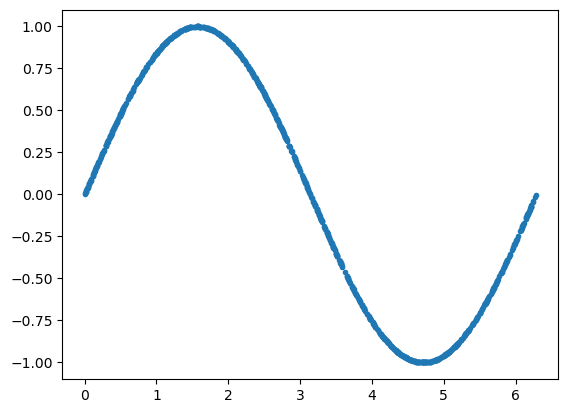

In [22]:
plots.plot_sin_dataset(train_data)

In [23]:
train_dataloader = data.sin_dataloader(1024, 32)

In [24]:
generator_sin = networks.GeneratorSin()
discriminator_sin = networks.DiscriminatorSin()

In [25]:
losses_generator, losses_discriminator = train.train_loop(generator_sin, discriminator_sin, train_dataloader, 300, 0.001)

Training: 100%|██████████| 300/300 [00:38<00:00,  7.77epoch/s, disc_loss=0.02114, gen_loss=0.02530]


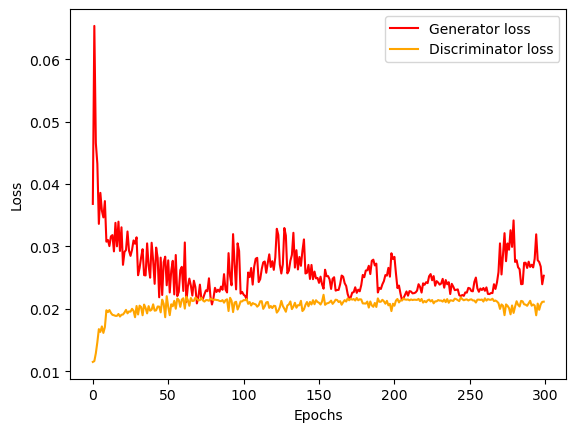

In [26]:
plots.plot_losses(losses_generator, losses_discriminator)

We should expect losses to converge as the generator and discriminator become tied at being good.

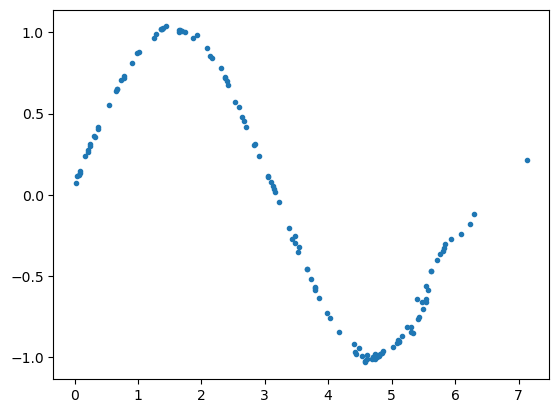

In [27]:
plots.generate_and_plot_sin(generator_sin, 128)

We can see how the examples generated by the generator resemble the distribution of the input data.

We continue with MNIST.

In [28]:
mnist_loader = data.mnist_dataloader(32)
mnist_generator = networks.GeneratorMNIST().to(DEVICE)
mnist_discriminator = networks.DiscriminatorMNIST().to(DEVICE)

In [29]:
losses_generator, losses_discriminator = train.train_loop(
    generator=mnist_generator,
    discriminator=mnist_discriminator,
    train_loader=mnist_loader,
    epochs=50,
    lr=0.0001,
    device=DEVICE,
)

Training: 100%|██████████| 50/50 [23:38<00:00, 28.36s/epoch, disc_loss=0.01810, gen_loss=0.03214]


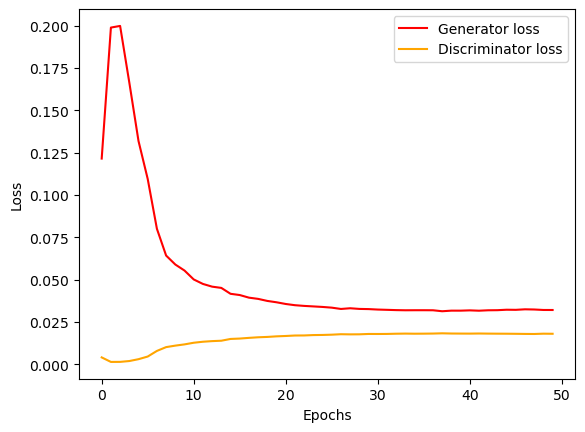

In [30]:
plots.plot_losses(losses_generator, losses_discriminator)

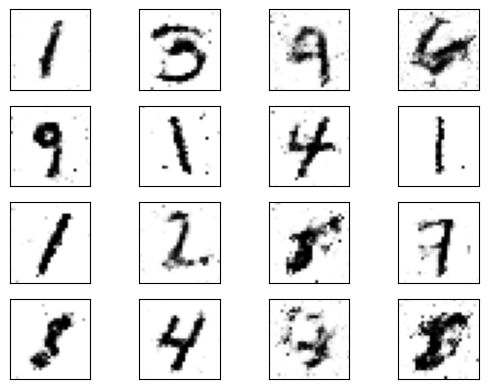

In [31]:
plots.generate_and_plot_mnist(mnist_generator, DEVICE)